# What makes people happy? 

The `World Happiness Report` is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. Over the last year’s, `World Happiness Report` focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.

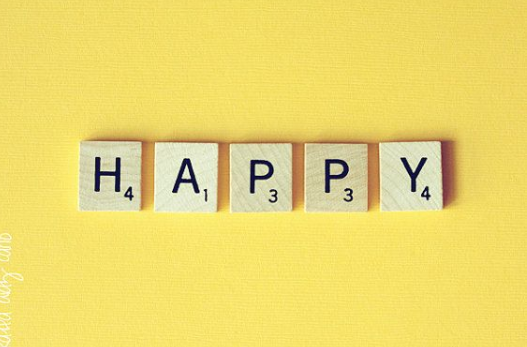


**Dataset information**

    The information in the datasets is based on answers to the most life evaluation address inquired within the survey. This address, known as the Cantril step, asks respondents to think of a step with the most excellent conceivable life for them being a 10 and the most exceedingly bad conceivable life being a and to rate their claim current lives on that scale. 


The Happiness Score is explained by the following factors:

- `Overall rank`: happiness rank of the different countries
- `Country or region`
- `Score`:  is a national average of the responses to the main life evaluation question asked in the Gallup World Poll (GWP), which uses the Cantril Ladder. Ranges from [0-10]
- `GDP per capita`
- `Healthy Life Expectancy`: score that goes from [0-1], being 1 the ones that have more confidence in terms of healthy life
- `Social support`: it indicates how people are appreciating the social support by governments, and it that ranges from [0-2]
- `Freedom to make life choices` score that ranges from 0 to 1, being 1 the ones that feel more free
- `Generosity`:score that ranges from 0 to 1, being 1 the ones that feel more generosity 
- `Perceptions of corruption`: perception of corruption on the country that it goes from  0 to 1. The higher this value is the lower perception of corruption 
- `year`  


# Exercise 1.Tell a story with your dataset, to try to answer the following question:

"Which factors are more important to live a happier life?As a result, people and countries can focus on the more significant factors to achieve a higher happiness level "

# To achieve this goal use the different funcionalities from the visualization libraries that you have seen in the module

## Import libraries, data, and functions

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import pandas_profiling
import numpy as np
import pycountry_convert as pc
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import iplot

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
sys.path.insert(0, "functions")
from myEDA import *

# reads csv file 
happy = pd.read_csv("data/happiness.csv", skipinitialspace = True)

In [3]:
happy

Unnamed: 0  Unnamed: 0.1  Overall rank         Country or region  Score  \
0             0             0             1                   Finland  7.632   
1             1             1             2                    Norway  7.594   
2             2             2             3                   Denmark  7.555   
3             3             3             4                   Iceland  7.495   
4             4             4             5               Switzerland  7.487   
..          ...           ...           ...                       ...    ...   
307         307           151           152                    Rwanda  3.334   
308         308           152           153                  Tanzania  3.231   
309         309           153           154               Afghanistan  3.203   
310         310           154           155  Central African Republic  3.083   
311         311           155           156               South Sudan  2.853   

     GDP per capita  Social support  Healthy life expectancy  \
0             1.305           1.592                      NaN   
1             1.456           1.582                      NaN   
2             1.351           1.590                      NaN   
3             1.343           1.644                      NaN   
4             1.420           1.549                      NaN   
..              ...             ...                      ...   
307           0.359           0.711                      NaN   
308           0.476           0.885                      NaN   
309           0.350           0.517                      NaN   
310           0.026           0.000                      NaN   
311           0.306           0.575                      NaN   

     Freedom to make life choices  Generosity  Perceptions of corruption  year  
0                           0.681       0.202                      0.393  2018  
1                           0.686       0.286                      0.340  2018  
2                           0.683       0.284                      0.408  2018  
3                           0.677       0.353                      0.138  2018  
4                           0.660       0.256                      0.357  2018  
..                            ...         ...                        ...   ...  
307                         0.555       0.217                      0.411  2019  
308                         0.417       0.276                      0.147  2019  
309                         0.000       0.158                      0.025  2019  
310                         0.225       0.235                      0.035  2019  
311                         0.010       0.202                      0.091  2019  

[312 rows x 12 columns]

In [4]:
# Drop the unnamed: 0 and unnamed: 0.1 columns

happy = happy.iloc[:, 2:]
happy

Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.632           1.305   
1               2                    Norway  7.594           1.456   
2               3                   Denmark  7.555           1.351   
3               4                   Iceland  7.495           1.343   
4               5               Switzerland  7.487           1.420   
..            ...                       ...    ...             ...   
307           152                    Rwanda  3.334           0.359   
308           153                  Tanzania  3.231           0.476   
309           154               Afghanistan  3.203           0.350   
310           155  Central African Republic  3.083           0.026   
311           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.592                      NaN                         0.681   
1             1.582                      NaN                         0.686   
2             1.590                      NaN                         0.683   
3             1.644                      NaN                         0.677   
4             1.549                      NaN                         0.660   
..              ...                      ...                           ...   
307           0.711                      NaN                         0.555   
308           0.885                      NaN                         0.417   
309           0.517                      NaN                         0.000   
310           0.000                      NaN                         0.225   
311           0.575                      NaN                         0.010   

     Generosity  Perceptions of corruption  year  
0         0.202                      0.393  2018  
1         0.286                      0.340  2018  
2         0.284                      0.408  2018  
3         0.353                      0.138  2018  
4         0.256                      0.357  2018  
..          ...                        ...   ...  
307       0.217                      0.411  2019  
308       0.276                      0.147  2019  
309       0.158                      0.025  2019  
310       0.235                      0.035  2019  
311       0.202                      0.091  2019  

[312 rows x 10 columns]

## EDA - first steps

In [5]:
# function from myEDA to get info, describe, numerical columns, and categorical columns
get_info_dataset(happy)

Basic information
 ---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  312 non-null    int64  
 1   Country or region             312 non-null    object 
 2   Score                         312 non-null    float64
 3   GDP per capita                312 non-null    float64
 4   Social support                312 non-null    float64
 5   Healthy life expectancy       7 non-null      float64
 6   Freedom to make life choices  312 non-null    float64
 7   Generosity                    312 non-null    float64
 8   Perceptions of corruption     311 non-null    float64
 9   year                          312 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 24.5+ KB

Basic statistics
 ----------------------------------------

(Index(['Overall rank', 'Score', 'GDP per capita', 'Social support',
        'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
        'Perceptions of corruption', 'year'],
       dtype='object'),
 Index(['Country or region'], dtype='object'))

In [6]:
#function from myEDA to get the shape of the original df and the shape after any duplicates are dropped
#since they're the same size, there aren't any duplicates

check_dup(happy)

Shape of the raw data (312, 10)
........................................
Shape of the new data (312, 10)


In [7]:
# function my myEDA to get the percentage of null values in each column
# be careful because a percentage of 0.0 can still have nulls, just not many

percentage_nullValues(happy)

Percentage_NaN
Healthy life expectancy                 97.8
Perceptions of corruption                0.3
Overall rank                             0.0
Country or region                        0.0
Score                                    0.0
GDP per capita                           0.0
Social support                           0.0
Freedom to make life choices             0.0
Generosity                               0.0
year                                     0.0

<div class="alert alert-block alert-info">
The columns, Healthy Life Expectance (HLE) is almost entirely nulls. What are some possibilities?
 <br>
 <ul>
     <li>I can drop that column but that would lose too much information!</li>
     <li>I can fill the missing values with the mean of the values that are there, but that would make HLE useless!</li>
 </ul>

The only thing to do is find more datasets with those values so I can merge them with my own dataset</div>

In [8]:
#I found two other datasets on Kaggle to help fill in HLE values

#read extra files to update healthy life expectancy
happy_2018 = pd.read_csv("data/2018.csv", skipinitialspace = True)
happy_2019 = pd.read_csv("data/2019.csv", skipinitialspace = True)

In [9]:
#add Healthy life expectancy values from 2018 and 2019 files

#combine the 2018 and 2019 to one df and reset index to make exactly like happiness df
extra_happy = happy_2018.append(happy_2019, ignore_index = True)

#drop all columns in extra df except HLE because that's all we need to add to happiness df
extra_happy = extra_happy[['Healthy life expectancy']]

#drop HLE column from happiness df
happy.drop(['Healthy life expectancy'], axis=1, inplace = True)

#combine the HLE column from extra_happy 
happy = pd.concat([happy,extra_happy['Healthy life expectancy']], axis = 1)
happy.head()


# I could have done this more easily by using conditional (check year and country) and fillna, but didn't know how yet

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   
2             3           Denmark  7.555           1.351           1.590   
3             4           Iceland  7.495           1.343           1.644   
4             5       Switzerland  7.487           1.420           1.549   

   Freedom to make life choices  Generosity  Perceptions of corruption  year  \
0                         0.681       0.202                      0.393  2018   
1                         0.686       0.286                      0.340  2018   
2                         0.683       0.284                      0.408  2018   
3                         0.677       0.353                      0.138  2018   
4                         0.660       0.256                      0.357  2018   

   Healthy life expectancy  
0                    0.874  
1                    0.861  
2                    0.868  
3                    0.914  
4                    0.927

In [10]:
#rename columns

happy.rename(columns = {'Overall rank': 'rank',
                   'Country or region':'country',
                   'Score': 'score',
                   'GDP per capita':'gdp',
                   'Social support': 'soc_supp',
                   'Healthy life expectancy': 'hle',
                   'Freedom to make life choices': 'freedom_lc',
                   'Generosity': 'gener',
                   'Perceptions of corruption': 'perc_corr'}, inplace = True)
#check column names
happy.head(0)

Empty DataFrame
Columns: [rank, country, score, gdp, soc_supp, freedom_lc, gener, perc_corr, year, hle]
Index: []

In [11]:
#set up regions to use with our data

def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    except:
        country_continent_name = 'None'
    return country_continent_name

#add continent information to our dataset based on country
happy['continent'] = happy['country'].apply(lambda x:country_to_continent(x))
happy.head()


rank      country  score    gdp  soc_supp  freedom_lc  gener  perc_corr  \
0     1      Finland  7.632  1.305     1.592       0.681  0.202      0.393   
1     2       Norway  7.594  1.456     1.582       0.686  0.286      0.340   
2     3      Denmark  7.555  1.351     1.590       0.683  0.284      0.408   
3     4      Iceland  7.495  1.343     1.644       0.677  0.353      0.138   
4     5  Switzerland  7.487  1.420     1.549       0.660  0.256      0.357   

   year    hle continent  
0  2018  0.874    Europe  
1  2018  0.861    Europe  
2  2018  0.868    Europe  
3  2018  0.914    Europe  
4  2018  0.927    Europe

In [12]:
# How many missing values do we have? Let's look at the sum, not the percentage this time
happy.isnull().sum()

rank          0
country       0
score         0
gdp           0
soc_supp      0
freedom_lc    0
gener         0
perc_corr     1
year          0
hle           0
continent     0
dtype: int64

## Fine-tuning with missing values

In [13]:
#from our closer look, we see that there was 1 null in perc_corr, so see which country/year it is
happy[pd.isnull(happy['perc_corr'])]

rank               country  score    gdp  soc_supp  freedom_lc  gener  \
19    20  United Arab Emirates  6.774  2.096     0.776       0.284  0.186   

    perc_corr  year   hle continent  
19        NaN  2018  0.67      Asia

In [14]:
#we see that it's UAE/2018, so look at UAE for both years to get UAE/2019 value

happy_uae = happy[happy['country']  ==  'United Arab Emirates']
happy_uae

rank               country  score    gdp  soc_supp  freedom_lc  gener  \
19     20  United Arab Emirates  6.774  2.096     0.776       0.284  0.186   
176    21  United Arab Emirates  6.825  1.503     1.310       0.598  0.262   

     perc_corr  year    hle continent  
19         NaN  2018  0.670      Asia  
176      0.182  2019  0.825      Asia

<div class="alert alert-block alert-info">
It's unlikely that UAE perception of corruption (perc_corr) change too much, so use the 2019 value for 2018
</div>

In [15]:
#replace NaN value with 0.182 - perception of corruption from 2019 (run this twice to see the change)
happy.perc_corr.fillna(0.182, inplace=True)
happy_uae

rank               country  score    gdp  soc_supp  freedom_lc  gener  \
19     20  United Arab Emirates  6.774  2.096     0.776       0.284  0.186   
176    21  United Arab Emirates  6.825  1.503     1.310       0.598  0.262   

     perc_corr  year    hle continent  
19         NaN  2018  0.670      Asia  
176      0.182  2019  0.825      Asia

In [16]:
#Let's take a closer look at what values were used in the new continent column
happy['continent'].unique()

array(['Europe', 'North America', 'Oceania', 'Asia', 'South America',
       'None', 'Africa'], dtype=object)

<div class="alert alert-block alert-info">
Some columns have None as the continent. Take a closer look to see what's going on. Hopefully there are only 5 that are missing both 2018 and 2019. Otherwise, some of the country names aren't correct.
</div>

In [17]:
#There are 10 countries with None as the continent. Let's see if that means 5 countries for both 2018 and 2019
happy[happy['continent']  ==  'None']

rank                  country  score    gdp  soc_supp  freedom_lc  gener  \
37     38        Trinidad & Tobago  6.192  1.223     1.492       0.575  0.171   
65     66                   Kosovo  5.662  0.855     1.230       0.448  0.274   
103   104  Palestinian Territories  4.743  0.642     1.217       0.266  0.086   
113   114      Congo (Brazzaville)  4.559  0.682     0.811       0.514  0.091   
131   132         Congo (Kinshasa)  4.245  0.069     1.136       0.312  0.197   
194    39        Trinidad & Tobago  6.192  1.231     1.477       0.489  0.185   
201    46                   Kosovo  6.100  0.882     1.232       0.489  0.262   
258   103      Congo (Brazzaville)  4.812  0.673     0.799       0.372  0.105   
265   110  Palestinian Territories  4.696  0.657     1.247       0.225  0.103   
282   127         Congo (Kinshasa)  4.418  0.094     1.125       0.269  0.212   

     perc_corr  year    hle continent  
37       0.019  2018  0.564      None  
65       0.023  2018  0.578      None  
103      0.076  2018  0.602      None  
113      0.077  2018  0.343      None  
131      0.052  2018  0.204      None  
194      0.016  2019  0.713      None  
201      0.006  2019  0.758      None  
258      0.093  2019  0.508      None  
265      0.066  2019  0.672      None  
282      0.053  2019  0.357      None

In [18]:
#add continents to the None items
happy['continent'].where(~(happy['country']=='Trinidad & Tobago'), 'North America', inplace=True)
happy['continent'].where(~(happy['country']=='Kosovo'), 'Europe', inplace=True)
happy['continent'].where(~(happy['country']=='Palestinian Territories'), 'Asia', inplace=True)
happy['continent'].where(~(happy['country']=='Congo (Kinshasa)'), 'Africa', inplace = True)
happy['continent'].where(~(happy['country']=='Congo (Brazzaville)'), 'Africa', inplace = True)

#check for any odd items
happy['continent'].unique()

array(['Europe', 'North America', 'Oceania', 'Asia', 'South America',
       'Africa'], dtype=object)

In [19]:
#individually check values that were changed - create a loop to see them all together
#happy[happy['country']=='Trinidad & Tobago']
#happy[happy['country']=='Kosovo']
#happy[happy['country']=='Palestinian Territories']
#happy[happy['country']=='Congo (Kinshasa)']
#happy[happy['country']=='Congo (Brazzaville)']

## Visualizations

country can not be represented as a histogram
continent can not be represented as a histogram


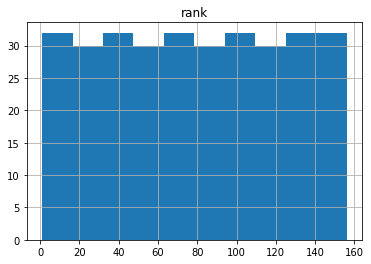

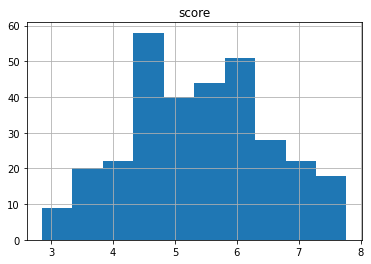

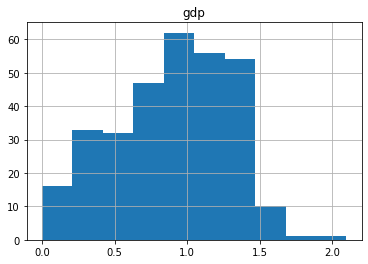

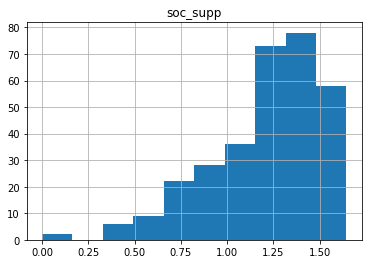

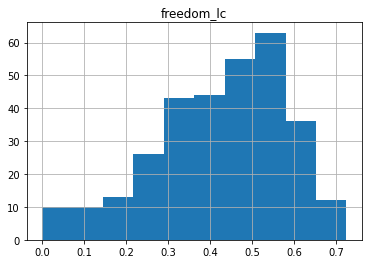

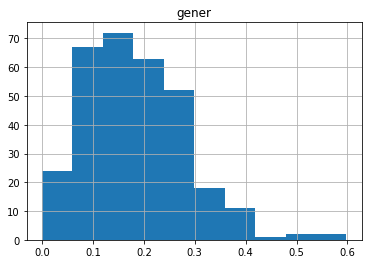

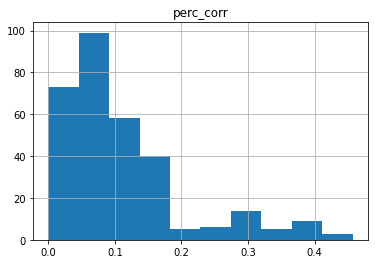

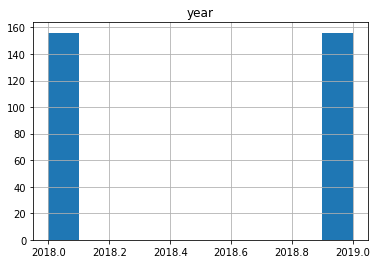

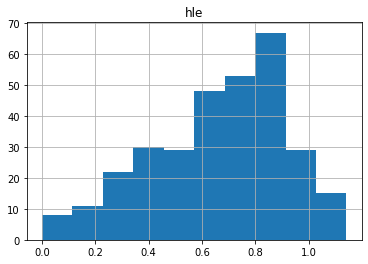

In [20]:
#create histogram for every column
#categorical data columns will output a sentence saying it can't be represented

all_hist(happy)


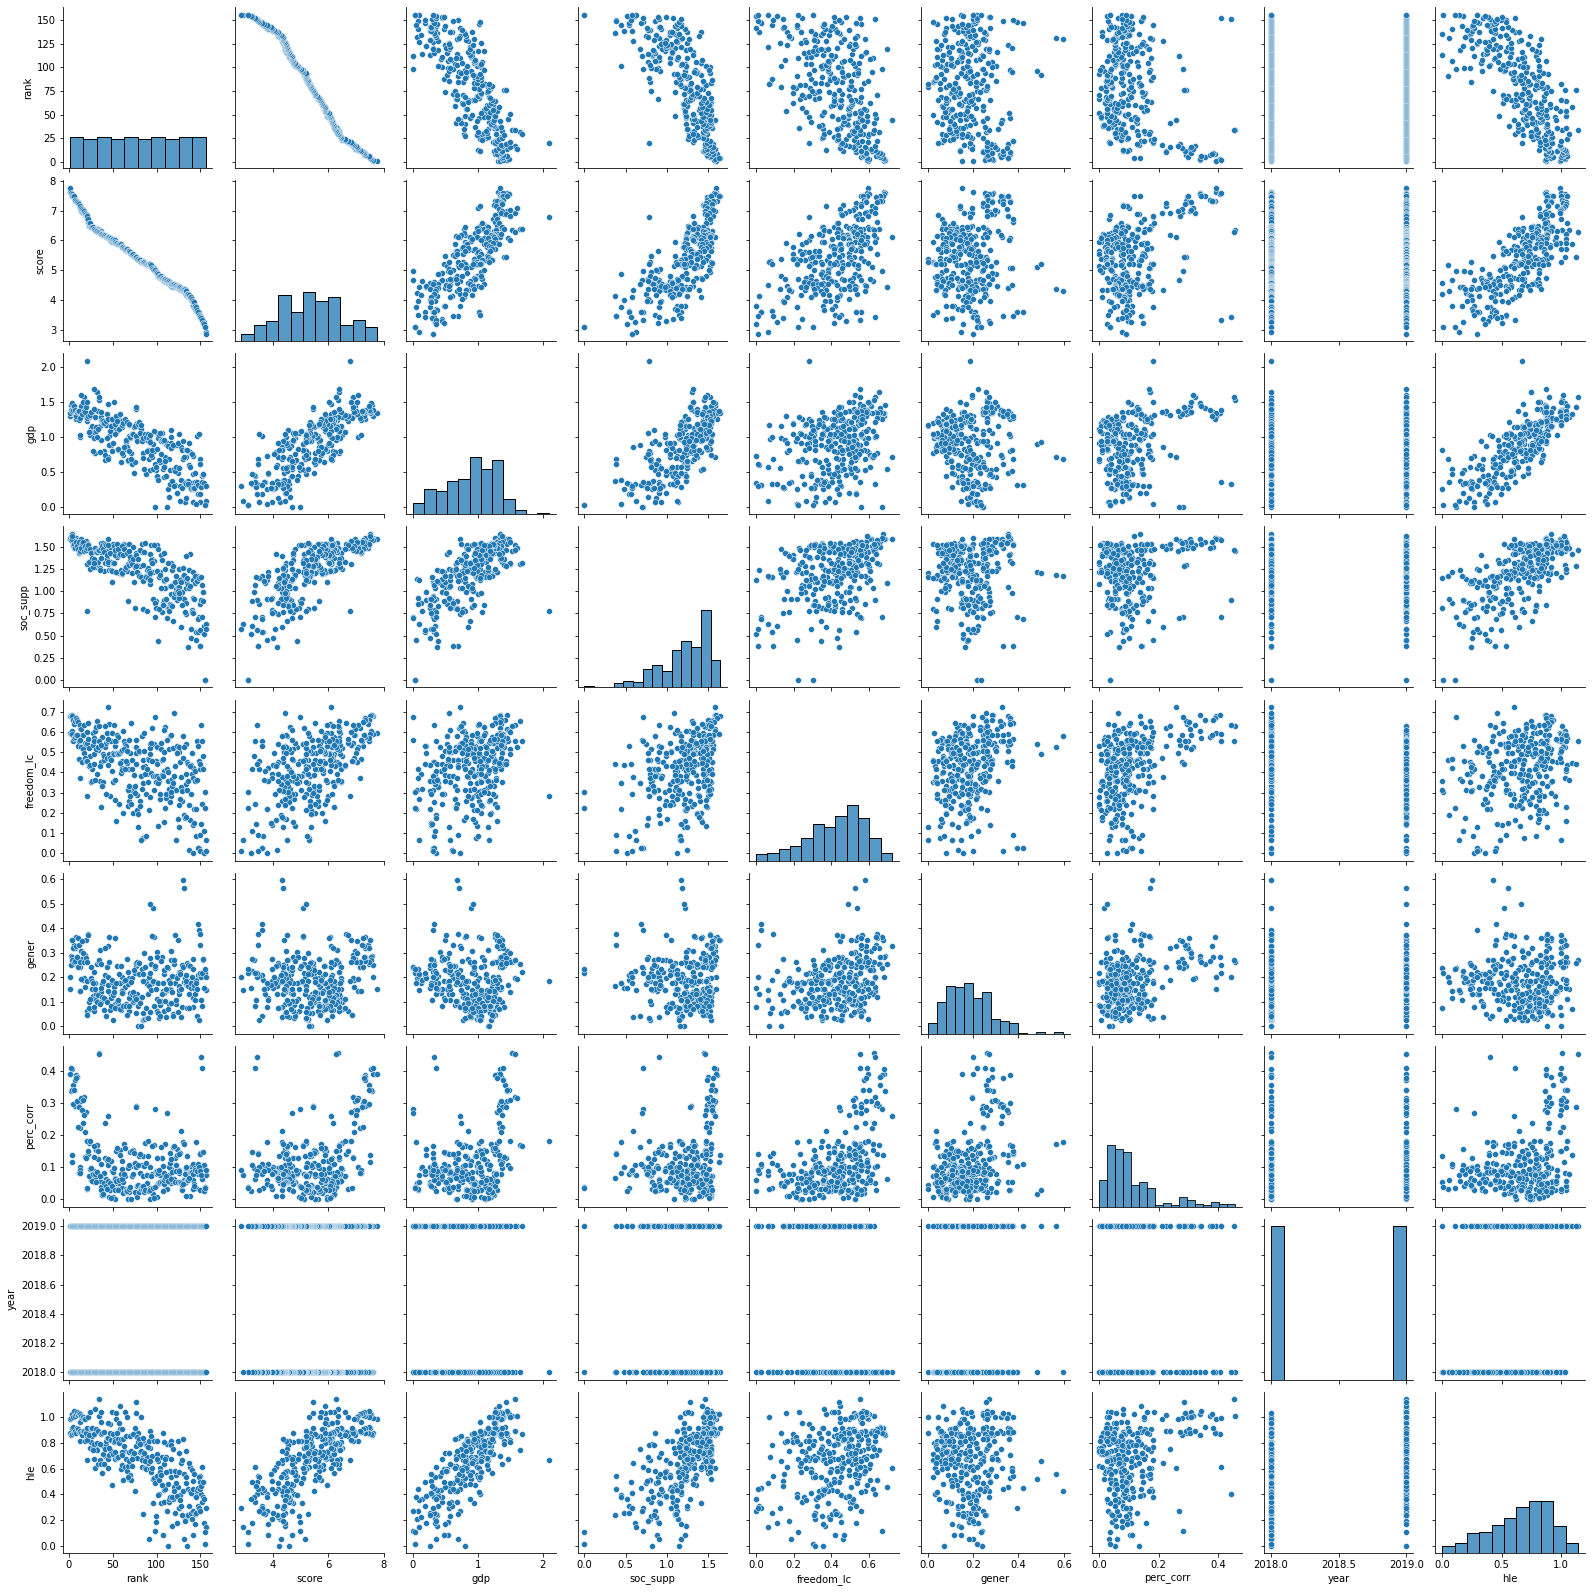

In [21]:
# Basic correlogram
sns.pairplot(happy)
plt.show()

[Text(0.5, 1.0, 'GDP by continent for 2018 and 2019')]

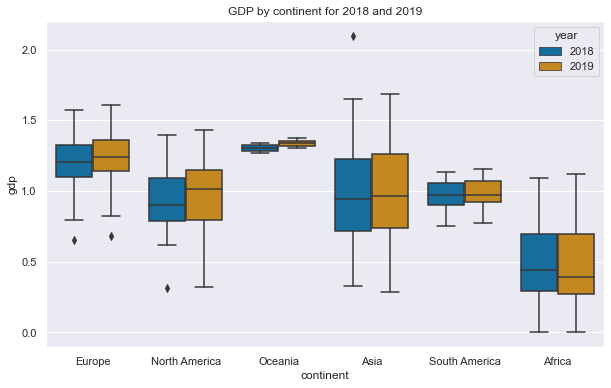

In [22]:
#create a grouped boxplot to show differences in continents by year

y_ax = 'gdp' #which variable do you want to look at by continent and year?
main_label = y_ax.upper() + ' by continent for 2018 and 2019'

sns.set(rc={"figure.figsize":(10, 6)}) #width=10, height=6
sns.boxplot(y= y_ax, x='continent', 
                 data=happy, 
                 palette="colorblind",
                 hue='year').set(title = main_label)

In [23]:
#I didn't need to do this (groupby), but I wanted to see if I could split the df

#split dataframe so we can check 2018 and 2019 separately and combined

happy18 = happy.iloc[:156, :]
happy19 = happy.iloc[156: , :].reset_index(drop = True)

#drop year columns
happy18.drop(['year'], axis=1, inplace = True)
happy19.drop(['year'], axis = 1, inplace = True)

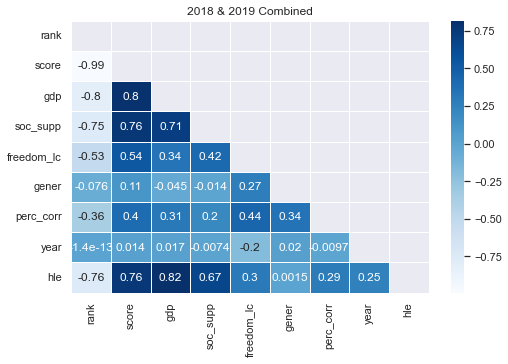

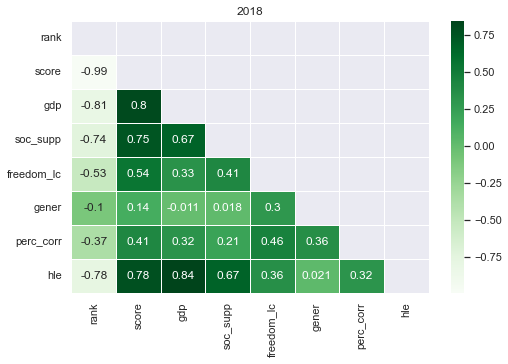

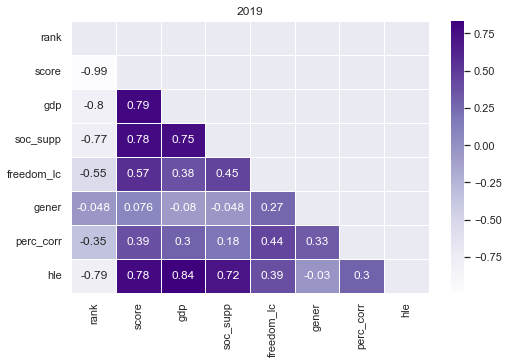

In [24]:
# plot combined years and both years separately
#only plot the bottom left half so no duplications

plt.figure(figsize = (8, 5))
corr_matrix=happy.corr()
#create a mask 
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap with the mask
ax = sns.heatmap(corr_matrix, mask=mask, annot=True, linewidths=.75, cmap ="Blues")
ax.set(title = '2018 & 2019 Combined')
plt.show()

plt.figure(figsize = (8, 5))
corr_matrix18=happy18.corr()
#create a mask 
mask = np.zeros_like(corr_matrix18)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap with the mask
ax = sns.heatmap(corr_matrix18, mask=mask, annot=True, linewidths = .75, cmap ="Greens")
ax.set(title = '2018')
plt.show()

plt.figure(figsize = (8, 5))
corr_matrix19=happy19.corr()
#create a mask 
mask = np.zeros_like(corr_matrix19)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap with the mask
ax = sns.heatmap(corr_matrix19, mask=mask, annot=True, linewidths = .75, cmap ="Purples")
ax.set(title = '2019')
plt.show()

<div class="alert alert-block alert-success"><b>
We can see that rank has the strongest correlations with the GDP per capita, higher life expectancy, and social supports in that order.</b></div>

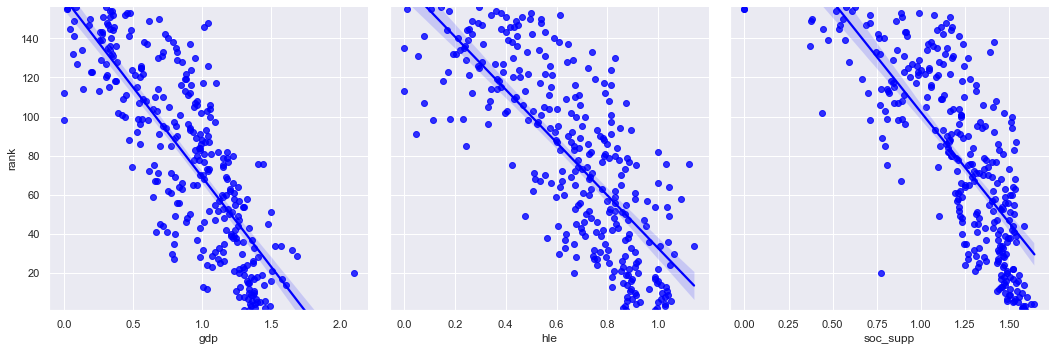

In [25]:
g = sns.PairGrid(happy, y_vars=["rank"], x_vars=["gdp", "hle", 'soc_supp'], height=5, palette="GnBu_d")
g.map(sns.regplot, color="blue")
g.set(ylim=(1, 156))

In [26]:
#run pandas profiling to see what hints it gives us

#prof = happy.profile_report()
#prof.to_file(output_file='output.html')

In [27]:
data = dict(type = 'choropleth', 
           locations = happy18['country'],
           locationmode = 'country names',
           z = happy18['score'], 
           text = happy18['country'],
           colorbar = {'title':'Happiness'})

layout = dict(title = 'World Happiness Scores 2018', 
              geo = dict(showframe = True))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

In [28]:
data = dict(type = 'choropleth', 
           locations = happy19['country'],
           locationmode = 'country names',
           z = happy19['score'], 
           text = happy19['country'],
           colorbar = {'title':'Happiness'})

layout = dict(title = 'World Happiness Score 2019', 
              geo = dict(showframe = True))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

In [29]:
# happiest continents in 2018
cont18 = happy18.groupby(['continent'])['score'].mean().nlargest().reset_index()
cont18

continent     score
0        Oceania  7.298000
1         Europe  6.189025
2  North America  6.094286
3  South America  5.979700
4           Asia  5.274717

In [30]:
# happiest continents in 2019
cont19 = happy19.groupby(['continent'])['score'].mean().nlargest().reset_index()
cont19

continent     score
0        Oceania  7.267500
1         Europe  6.274050
2  North America  6.154692
3  South America  5.920200
4           Asia  5.265739

# For further study

1. Which variables seems to affect the overall rank the most 
2. Is the over all rank related to the gdp per capita
3. Which continents the happiest?
4. Is there any connection bewteen the perception of corruption and freedom of life choices
5. Do countries with the higher generosity score have a higher healthy_life_expectancy

1. can we find anything on education that might give more insight
2. how about women's rights? any correlations there?
3. how did neighboring countries score? close to each other?
4. Do the types of government have anything to do with happiness rating?

https://worldhappiness.report/
    data from 2012 until 2021 same as our dataset so high compatibility
    data also has regions
https://www.worldbank.org/en/home
    very customizable
    has education, but lots of missing values in 2019
https://sdgstoday.org/dataset-hub

https://www.happinesscouncil.org/report/2018/
    is there a dataset? it would be nice to compare this to our data